Imports

In [67]:
import numpy as np
import os
import cv2
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [68]:
from Network import Network
from MaxPooling import MaxPooling
from FullyConnected import FullyConnected
from Convolution import Convolution
from CrossEntropyLossFunction import CrossEntropyLossFunction
from Sigmoid import Sigmoid
from Softmax import Softmax
from Tanh import Tanh
from Flatten import Flatten
from ReLU import ReLU

Extract Data

In [111]:
classes = sorted(os.listdir('asl_dataset'))

class_to_index = {}
for index, cls in enumerate(classes):
    class_to_index[cls] = index

In [112]:
images = []
labels = []

for folder in classes:
    folder_dir = os.path.join('asl_dataset', folder)

    for image in os.listdir(folder_dir):
        img_path = os.path.join(folder_dir, image)

        data_sample = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        data_sample = cv2.resize(data_sample, (64, 64))
        data_sample = data_sample / 255.0

        images.append(data_sample)
        labels.append(class_to_index[folder])

Preprocess the Data

In [76]:
x_data = np.array(images).reshape(-1, 1, 64, 64)

In [77]:
num_classes = len(classes)

y_data = np.zeros((len(labels), num_classes))
for i, label in enumerate(labels):
    y_data[i, label] = 1

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

Create the Model

In [79]:
loss_function = CrossEntropyLossFunction()

network_layers = [
    Convolution(input_shape=(1, 64, 64), output_depth=16, kernel_size=3),
    ReLU(),
    MaxPooling(pool_size=2, stride=2),

    Convolution(input_shape=(16, 31, 31), output_depth=32, kernel_size=3),
    ReLU(),
    MaxPooling(pool_size=2, stride=2),

    Convolution(input_shape=(32, 14, 14), output_depth=64, kernel_size=3),
    ReLU(),
    MaxPooling(pool_size=2, stride=2),

    Flatten(),

    FullyConnected(input_size=64 * 6 * 6, output_size=256),
    ReLU(),

    FullyConnected(input_size=256, output_size=y_data.shape[1]),
    Softmax()
]

In [80]:
ASL_model = Network(network_layers, loss_function)

In [81]:
ASL_model.train(x_train, y_train, 20, 0.001)

Save the Model

In [82]:
import pickle

filename = 'ASL_trained_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(ASL_model, file)

Retrieve the Model

In [83]:
with open('ASL_trained_model.pkl', 'rb') as model:
    CNN = pickle.load(model)

In [125]:
def predict():
    rand_index = np.random.randint(0, len(x_test) - 1)
    image = x_test[rand_index]
    true_label = np.argmax(y_test[rand_index])

    prediction = CNN.predict(image)
    predicted_label = np.argmax(prediction)

    print(f"True Label: {classes[true_label]}")
    print(f"Predicted Label: {classes[predicted_label]}")

    plt.imshow(image[0], cmap='gray')
    plt.show()

True Label: l
Predicted Label: l


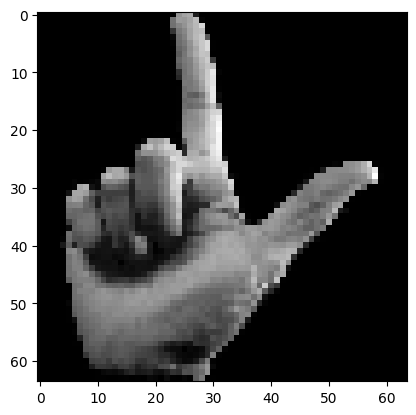

None


In [126]:
print(predict())

In [123]:
def accuracy():
    cnt = 0
    num_images = len(x_test)

    for i in range(num_images):
        img = x_test[i]
        true_label = np.argmax(y_test[i])

        prediction = CNN.predict(img)
        predicted_label = np.argmax(prediction)

        if predicted_label == true_label:
            cnt += 1

    return (cnt / num_images) * 100

print(accuracy())

70.37773359840955


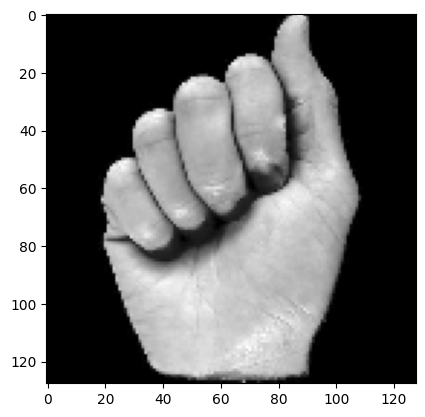

In [124]:
image = cv2.imread('/Users/aaryanpatel/Documents/ComputerScience/CSC590MachineLearning/ASL-CNN/asl_dataset/a/hand1_a_bot_seg_5_cropped.jpeg', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (128, 128))

plt.imshow(image, cmap='gray')
plt.show()